# 辻井 GBDT手習い

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

sns.set()
%matplotlib inline

# ワーニングを無視する
warnings.filterwarnings('ignore')

# 自作ライブラリの読み込み
import importlib
import gbdt_wrap.data_loader as d_load
from gbdt_wrap.gbdt_wrap import (GBDTExecutor, 
                                 LightGBMWrap, 
                                 XGBoostWrap, 
                                 CatBoostWrap)


In [2]:
# データロード関数定義

def load_data():
  df = sns.load_dataset('tips') 

  # 喫煙者かどうかをバイナリ変換する(0:No 1:Yes)
  df['smoker'] = (df['smoker']
                    .apply(lambda x: 1 if x == 'Yes' else 0)
                    .astype(int))

  return df      

load_data()      

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


In [3]:
# データ定義
target = 'smoker'
categories = ['sex', 'day', 'time']
loader = d_load.DataLoaderBase(target,
                               categories,
                               load_data)

     total_bill   tip     sex   day    time  size
0         16.99  1.01  Female   Sun  Dinner     2
1         10.34  1.66    Male   Sun  Dinner     3
2         21.01  3.50    Male   Sun  Dinner     3
3         23.68  3.31    Male   Sun  Dinner     2
4         24.59  3.61  Female   Sun  Dinner     4
..          ...   ...     ...   ...     ...   ...
239       29.03  5.92    Male   Sat  Dinner     3
240       27.18  2.00  Female   Sat  Dinner     2
241       22.67  2.00    Male   Sat  Dinner     2
242       17.82  1.75    Male   Sat  Dinner     2
243       18.78  3.00  Female  Thur  Dinner     2

[244 rows x 6 columns]
__NA__
     total_bill   tip     sex   day    time  size
0         16.99  1.01  Female   Sun  Dinner     2
1         10.34  1.66    Male   Sun  Dinner     3
2         21.01  3.50    Male   Sun  Dinner     3
3         23.68  3.31    Male   Sun  Dinner     2
4         24.59  3.61  Female   Sun  Dinner     4
..          ...   ...     ...   ...     ...   ...
239       29.03  5.

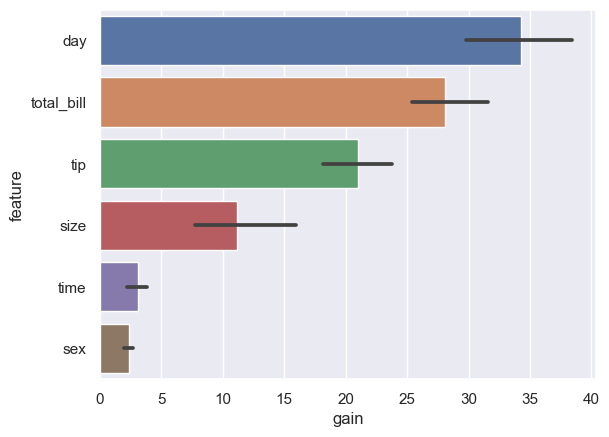

In [4]:
executor = GBDTExecutor()
#executor.add_target(XGBoostWrap(loader))
#executor.add_target(LightGBMWrap(loader))
executor.add_target(CatBoostWrap(loader))
executor.learn_all()

